# Ismael Hasan
## Project 4

**IS 362 - Dr. Charles Pak - CUNY School of Professional Studies**

**Predictive Analysis using scikit-learn**

Your assignment is to:<br>

> 1. Start with the __[mushroom data](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data)__ in the pandas DataFrame that you constructed in your “Assignment – Preprocessing Data with sci-kit learn.”
> 2. Use scikit-learn to determine which of the two predictor columns that you selected (odor and one other column of your choice) most accurately predicts whether or not a mushroom is poisonous. There is an additional challenge here—to use scikit-learn’s predictive classifiers, you’ll want to convert each of your two (numeric categorical) predictor columns into a set of columns. See for one approach pandas get_dummies() method.
> 3. Clearly state your conclusions along with any recommendations for further analysis

Data Source: __[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)__

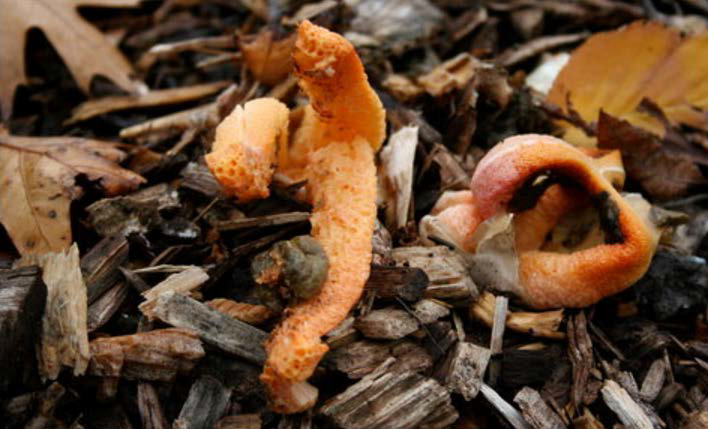

In [112]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

***Read and display Mushroom dataset (first 5 rows) and create meaningful columns***

In [113]:
mushroom_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushrooms = pd.read_csv(mushroom_data, header = None, usecols = [0, 5, 22], names = ['Edible', 'Odor', 'Habitat'])

mushrooms.head()

,Edible,Odor,Habitat
0,p,p,u
1,e,a,g
2,e,l,m
3,p,p,u
4,e,n,g


***Convert Odor and Habitat columns into a set of columns***

In [114]:
raw_data = {'Edible': ['p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p'], 
            'Odors': ['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'], 
            'Habitats': ['g', 'l', 'm', 'p', 'u', 'w', 'd', 'g', 'l']
           }

df = pd.DataFrame(raw_data, columns = ['Edible', 'Odors', 'Habitats'])
df.head()

,Edible,Odors,Habitats
0,p,a,g
1,e,l,l
2,p,c,m
3,e,y,p
4,p,f,u


***Assign numberical values for Odors using get_dummies() method***

In [115]:
odor_dummy = pd.get_dummies(df['Odors'])
odor_dummy

,a,c,f,l,m,n,p,s,y
0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,1,0


***Assign numberical values for Habitats using get_dummies() method***

In [116]:
habitat_dummy = pd.get_dummies(df['Habitats'])
habitat_dummy

,d,g,l,m,p,u,w
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0
5,0,0,0,0,0,0,1
6,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0
8,0,0,1,0,0,0,0


***Combine both columns into 1 dataframe***

In [117]:
df_new = pd.concat([df, odor_dummy, habitat_dummy], axis = 1)
df_new

,Edible,Odors,Habitats,a,c,f,l,m,n,p,s,y,d,g,l,m,p,u,w
0,p,a,g,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,e,l,l,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,p,c,m,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,e,y,p,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,p,f,u,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,e,m,w,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6,p,n,d,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
7,e,p,g,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
8,p,s,l,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


***Determine whether Odor or Habitat accurately predicts if a mushroom is edible or poisonous*** <br>
***Definine x and y values***

In [118]:
x = odor_dummy.iloc[:, :-1].values
y = habitat_dummy.iloc[:, 1].values

***Setup training and testing models***

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6, 8)
(6,)
(3, 8)
(3,)


***Use linear regression to predict y value with a test variable*** <br>
***Use sci-kit learn to predict true and predictive output***

In [120]:
linreg = sklearn.linear_model.LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
t = [1, 0]
p = [1, 0]

print(sklearn.metrics.mean_absolute_error(t, p))
print(sklearn.metrics.mean_squared_error(t, p))
print(np.sqrt(sklearn.metrics.mean_squared_error(t, p)))

0.0
0.0
0.0


***Calculate margin of error***

In [121]:
x = odor_dummy.iloc[:, 2:10].values
y = habitat_dummy.iloc[:, 1].values
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, random_state=1)
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.0000000000000002


***Final Analysis & Conclusion*** <br> <br>
***After analyzing the mushroom data, we can identify a very low margin of error and high accuracy rate. We can identify Odor and Habitat as accurate indicators that will determine if the mushroom is edible or poisonous.***